# **Decision Tree (Classification)**

A decision tree is a supervised learning algorithm that recursively splits the dataset into subsets based on feature values to predict a target class.

---

## **Initial Model Training**
- A decision tree was trained on the dataset, achieving a training accuracy of **99.69%** and a testing accuracy of **83.75%**.  
- The model is **overfitted**, as it performs well on training data but poorly on unseen data (testing). Overfitting occurs when the tree becomes too complex, memorizing the training data instead of generalizing patterns.

---

## **Pruning to Address Overfitting**

### **1. Pre-Pruning**
- **Pre-pruning** involves setting constraints on the tree during the training phase to limit its growth.
- The maximum depth of the tree was restricted to **5**, resulting in:
  - Training accuracy: **93.44%**  
  - Testing accuracy: **90.00%**
- By limiting the tree's depth, the model becomes simpler, reducing overfitting and improving generalization.

### **2. Post-Pruning**
- **Post-pruning** is applied after the tree has been fully grown. The tree is then trimmed back, removing nodes that do not significantly contribute to the model's performance.
- The process involves evaluating the model's performance at different maximum depths:
  - Across depths from 1 to 9, the training accuracy remained **93.44%**, and testing accuracy remained **90.00%**.
- Selecting an optimal depth (e.g., **3**) further simplifies the tree:
  - Training accuracy: **91.88%**  
  - Testing accuracy: **90.00%**

---

## **Key Takeaways**
- Pre-pruning and post-pruning are effective techniques for reducing overfitting in decision trees.  
- By limiting the tree's depth, the model's complexity is controlled, leading to better generalization on unseen data.
- Pre-pruning is proactive, while post-pruning is reactive, both aiming to balance model performance and simplicity.

### **Choosing Between Pre-Pruning and Post-Pruning**
- Use **pre-pruning** to avoid excessive growth during training when you want quick control over complexity.  
- Use **post-pruning** to fine-tune a fully grown tree by removing unnecessary nodes based on performance evaluation.


In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
ads_data = pd.read_csv('Social_Network_Ads.csv')
ads_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [386]:
ads_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [387]:
x = ads_data.iloc[:,2:-1]
y = ads_data['Purchased']
x.head(3)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


In [388]:
#gender_map = {'Male':1, 'Female':0}
#x['Gender'] = x['Gender'].map(gender_map)

In [389]:
x.head(3)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


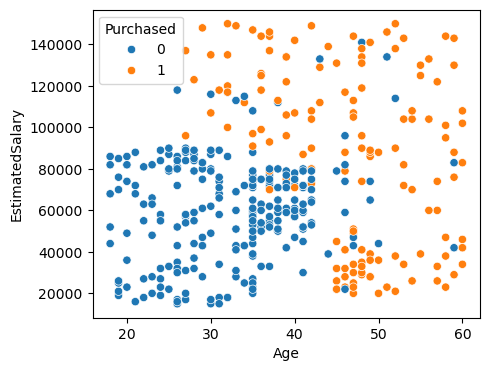

In [390]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=ads_data)
plt.show()

In [391]:
from sklearn.preprocessing import StandardScaler

In [392]:
sc = StandardScaler()
sc.fit(x)
arr = sc.transform(x)
x = pd.DataFrame(arr, columns=x.columns)

In [393]:
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [394]:
from sklearn.model_selection import train_test_split

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [396]:
from sklearn.tree import DecisionTreeClassifier

In [397]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test,y_test)*100

83.75

In [398]:
from sklearn.tree import plot_tree

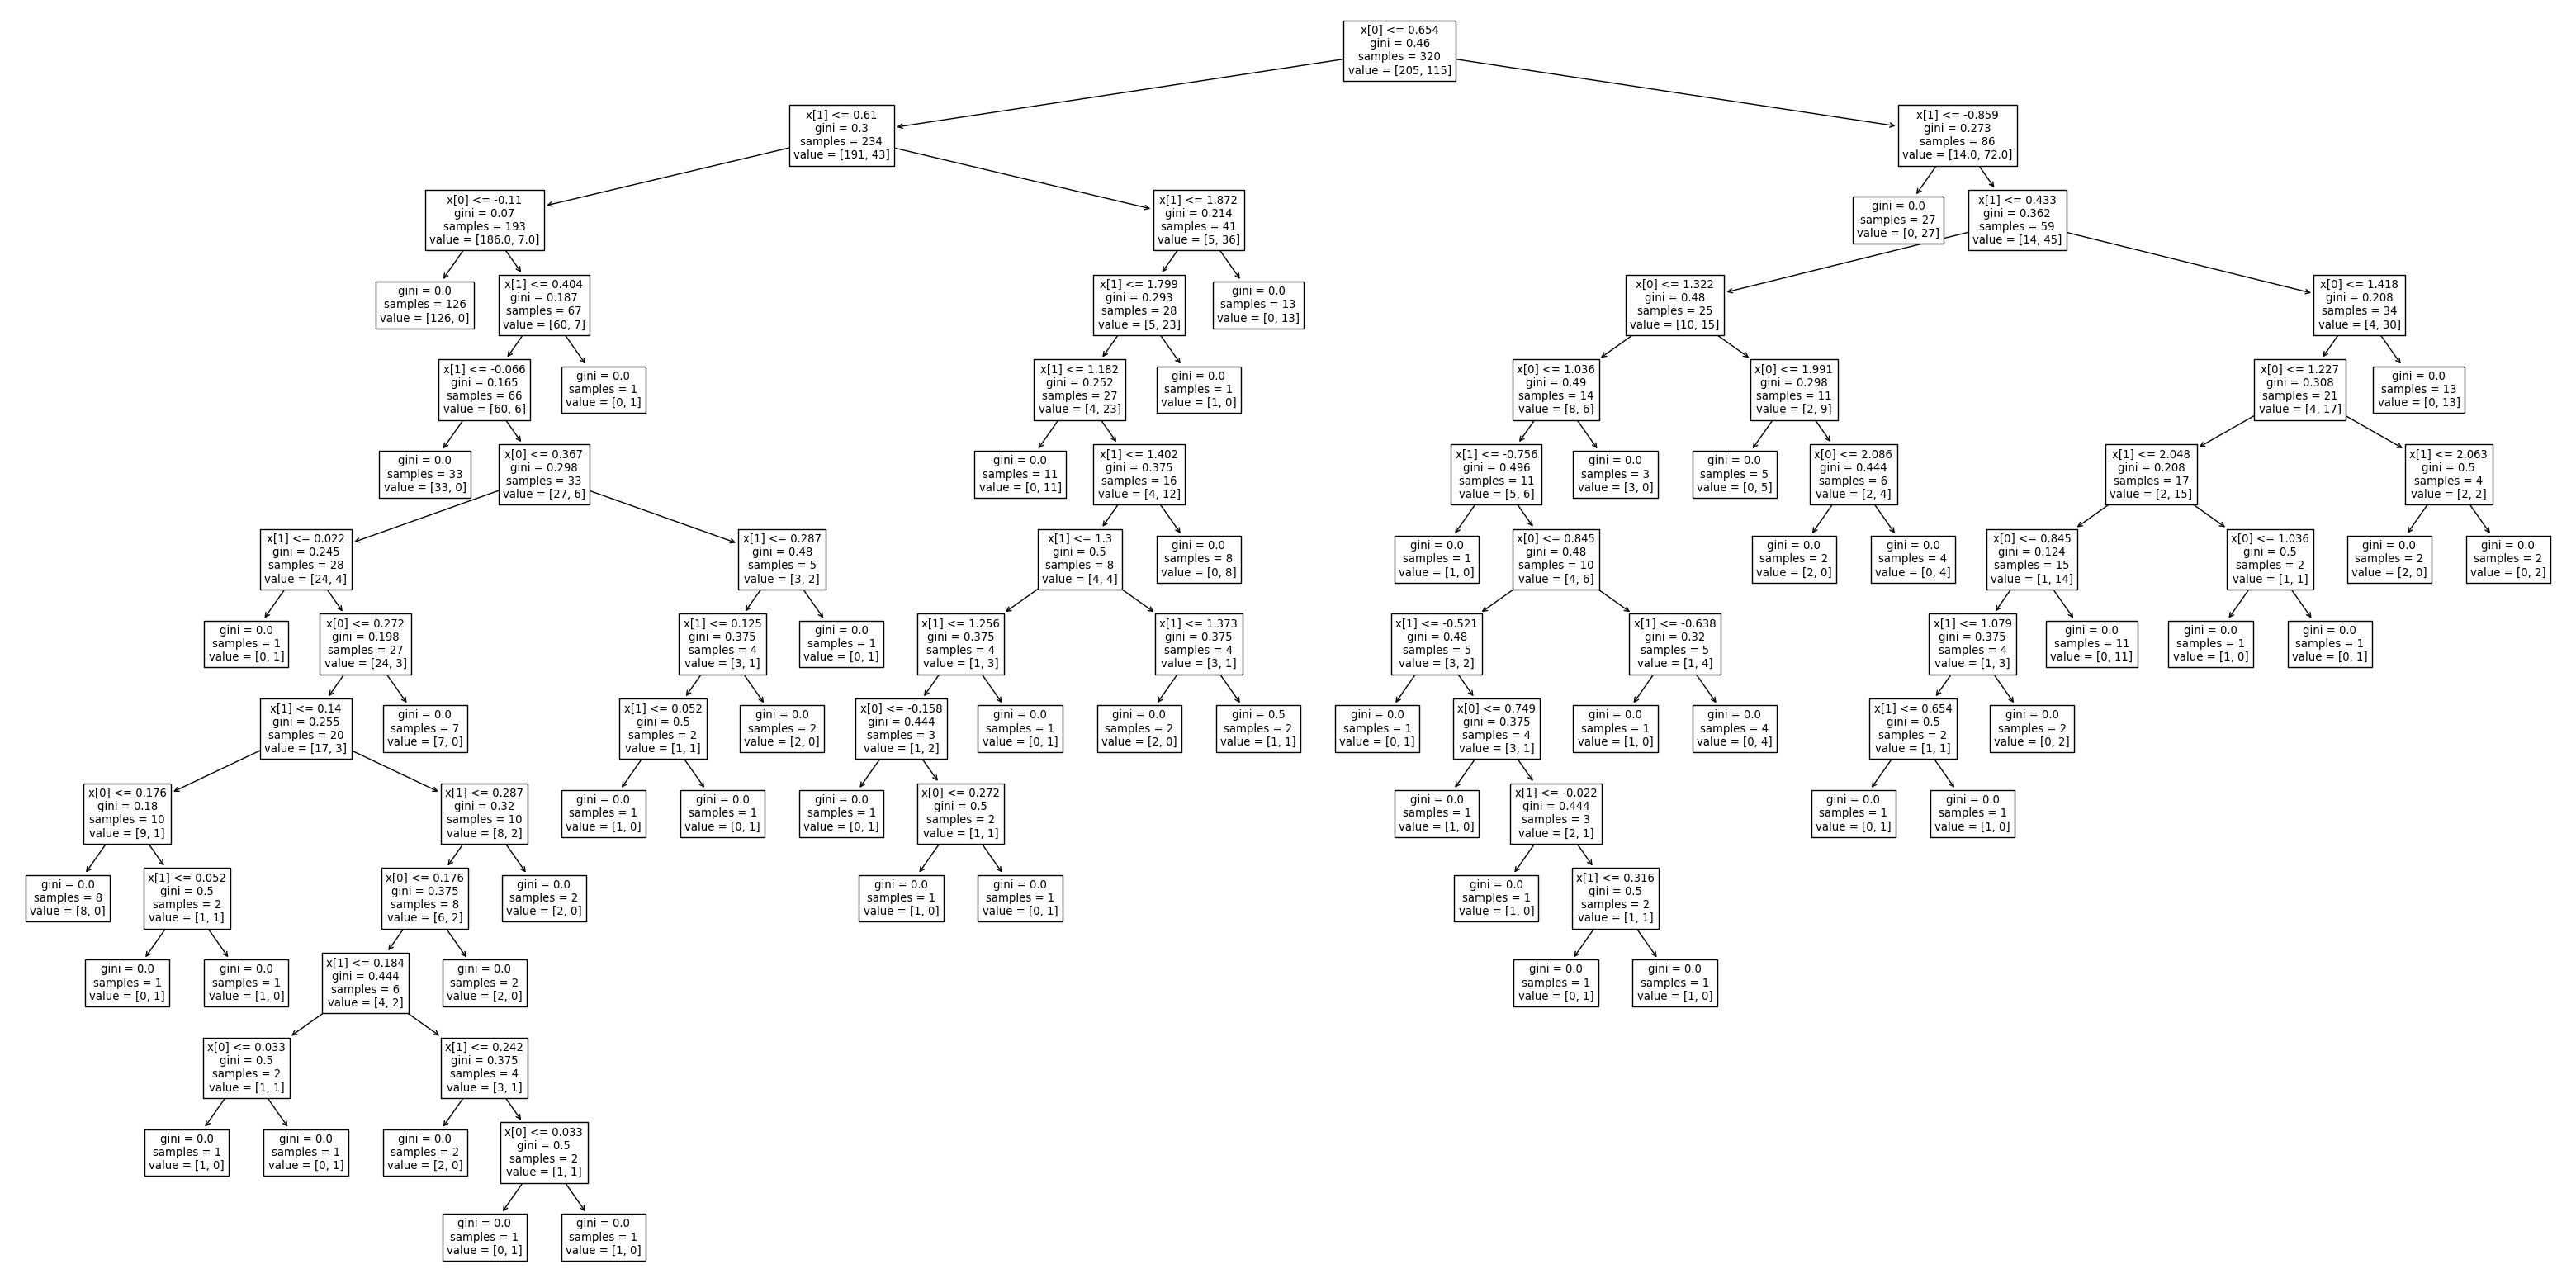

In [399]:
plt.figure(figsize=(40,20))
plot_tree(decision_tree=dt)
plt.show()

In [400]:
from mlxtend.plotting import plot_decision_regions

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


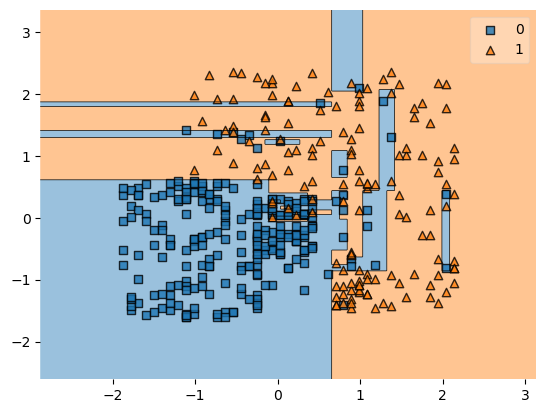

In [401]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

In [402]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.6875, 83.75)

Hence, model is overfitted. Lets Use Pruning

## 1.Pre Pruning

In [403]:
dt_pre = DecisionTreeClassifier(max_depth=5)
dt_pre.fit(x_train, y_train)

dt_pre.score(x_train, y_train)*100, dt_pre.score(x_test, y_test)*100

(93.4375, 90.0)

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


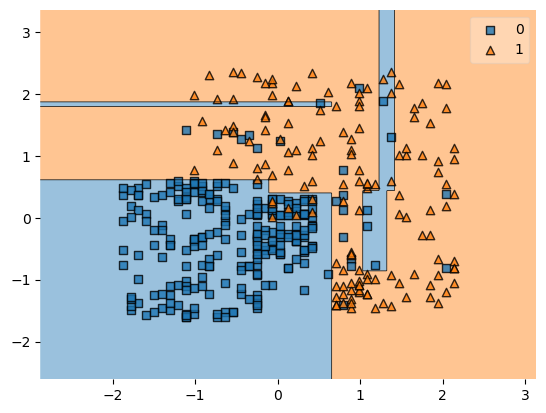

In [404]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_pre)
plt.show()

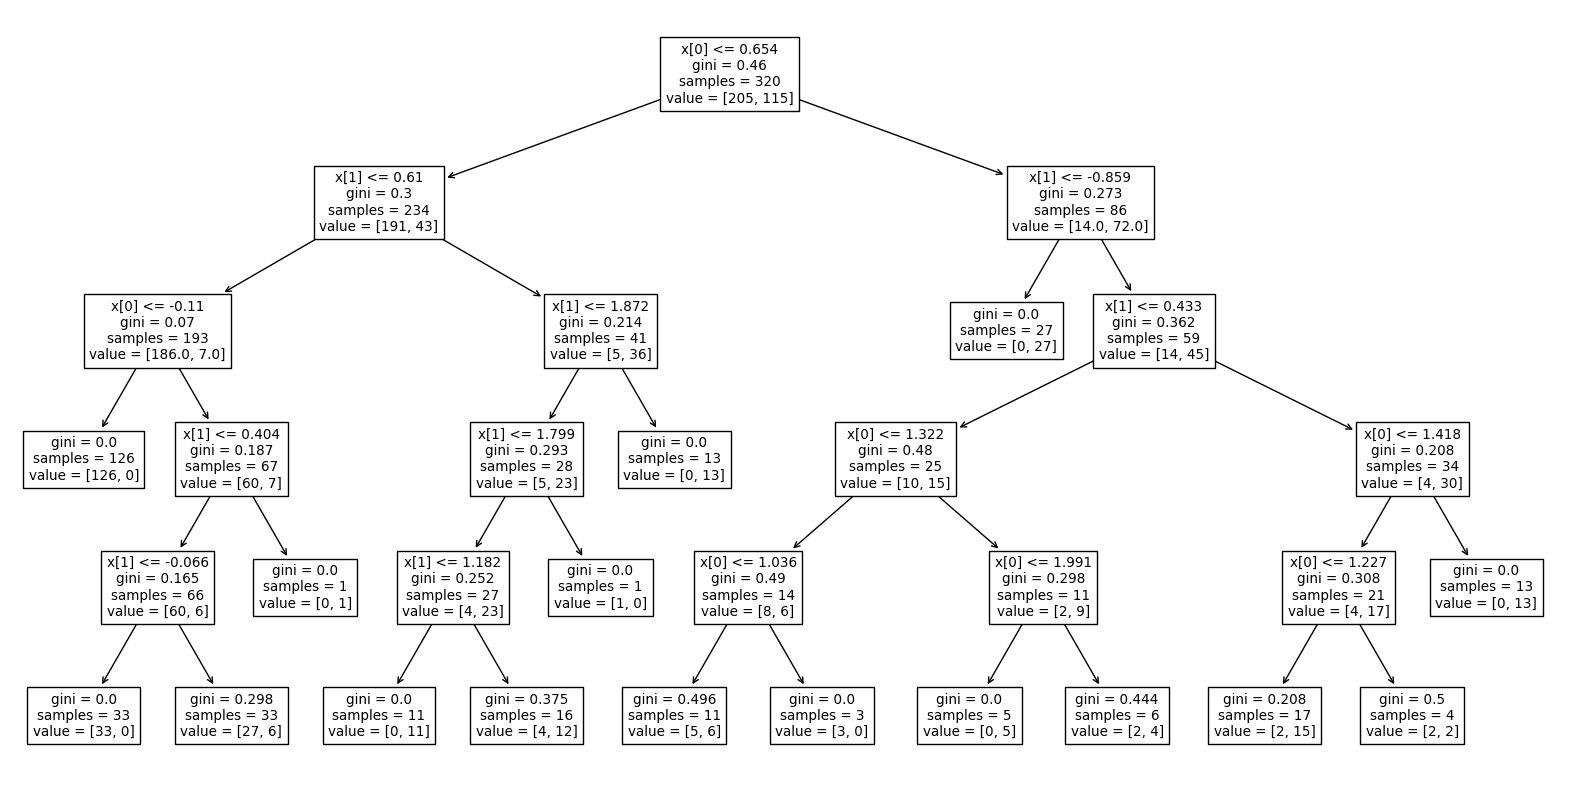

In [405]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=dt_pre)
plt.show()

## 2.Post Pruning

In [406]:
for i in range(1,10):
    dt_post = DecisionTreeClassifier(max_depth=i)
    dt_post.fit(x_train, y_train)
    print(dt_pre.score(x_train, y_train)*100, dt_pre.score(x_test, y_test)*100, i)

93.4375 90.0 1
93.4375 90.0 2
93.4375 90.0 3
93.4375 90.0 4
93.4375 90.0 5
93.4375 90.0 6
93.4375 90.0 7
93.4375 90.0 8
93.4375 90.0 9


Here max depth=2 or 3 fix the overfitting properly

In [407]:
dt_post = DecisionTreeClassifier(max_depth=3)
dt_post.fit(x_train, y_train)

dt_post.score(x_train, y_train)*100, dt_pre.score(x_test, y_test)*100

(91.875, 90.0)

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


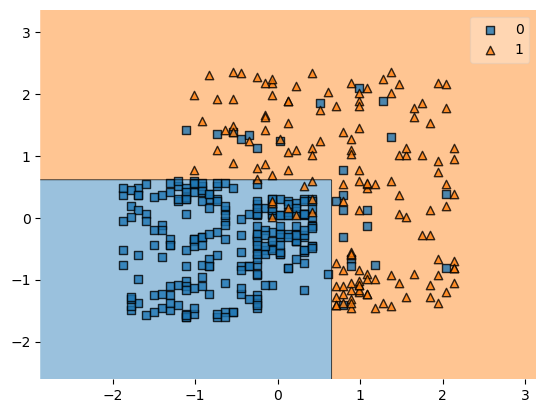

In [408]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_post)
plt.show()

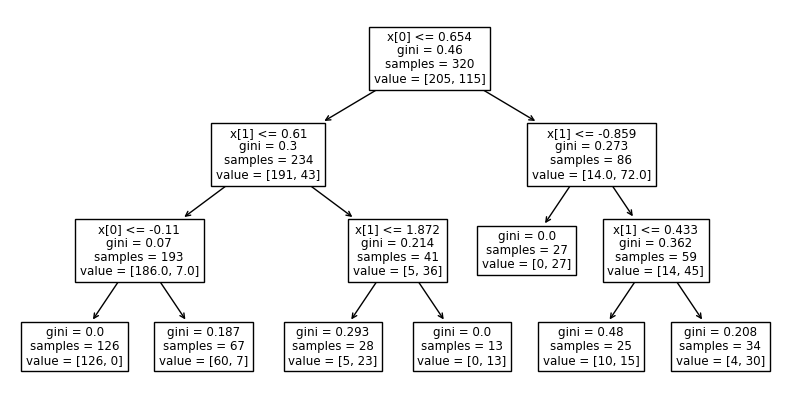

In [409]:
plt.figure(figsize=(10,5))
plot_tree(decision_tree=dt_post)
plt.show()